<a href="https://colab.research.google.com/github/Patrick-Setubal/Data_Science_Analytics/blob/main/alura_curso/formacao_machine_learning/MLClassificacao/MLClassificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Curso Alura "Machine Learning: classificação por trás dos panos"

# Definição do Problema

**Empresa:**
Aluravoz

**Objetivo:**
Controlar o numero de Churn (Taxa de evasão de clientes)

**Local do Projeto:** https://github.com/Patrick-Setubal/Data_Science_Analytics/blob/main/alura_curso/formacao_machine_learning/MLClassificacao/MLClassificacao.ipynb

# Coleta dos Dados

## Importando Bibliotecas

In [38]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

## Importando dados

In [2]:
# Importando dados
link = "https://raw.githubusercontent.com/Patrick-Setubal/Data_Science_Analytics/main/alura_curso/formacao_machine_learning/MLClassificacao/Customer-Churn.csv"
dados = pd.read_csv(link)

# Visualizando Dados
print(f"Os  dados possui {dados.shape[1]} Colunas e {dados.shape[0]} Linhas \n")
display(dados.head())


Os  dados possui 18 Colunas e 7043 Linhas 



,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


# Análise exploratória de dados

In [3]:
# Resumo estatístico das variaveis Numericas do DataFrame
dados.describe()

,Maior65Anos,MesesDeContrato,ContaMensal
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# Verificando informações sobre as colunas
display(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

None

Muitas variaveis Categóricas que precisam ser transformadas em binárias

In [5]:
# Verificando a quantidade de valores ausentes por coluna")
display(dados.isnull().sum())

Maior65Anos                0
Conjuge                    0
Dependentes                0
MesesDeContrato            0
TelefoneFixo               0
VariasLinhasTelefonicas    0
ServicoDeInternet          0
SegurancaOnline            0
BackupOnline               0
SeguroNoDispositivo        0
SuporteTecnico             0
TVaCabo                    0
StreamingDeFilmes          0
TipoDeContrato             0
PagamentoOnline            0
FormaDePagamento           0
ContaMensal                0
Churn                      0
dtype: int64

Nenhum Missign encontrado

In [6]:
# Contagem de valores únicos para variáveis categóricas
col_object = dados.select_dtypes(include='object').columns
print(f"Possui {len(col_object)} Colunas Categoricas")


Possui 15 Colunas Categoricas


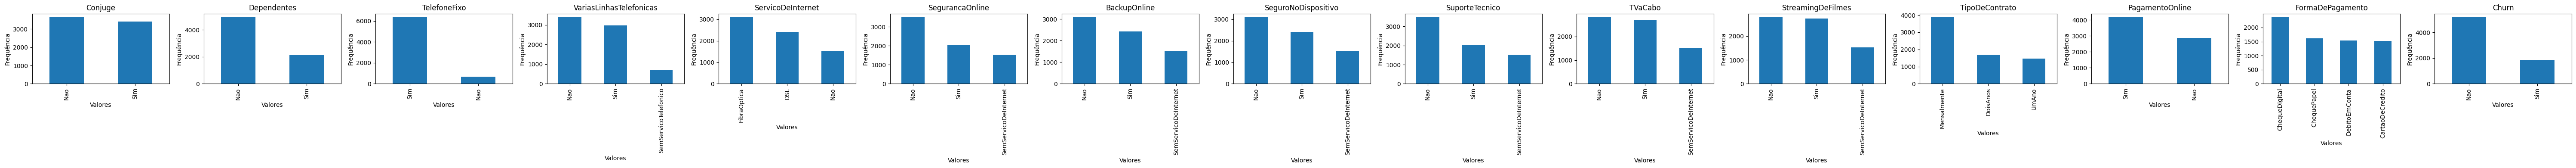

In [7]:
import matplotlib.pyplot as plt

# Criar a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=15, figsize=(15 * 4, 4))

# Iterar sobre as colunas categóricas
for i, column in enumerate(col_object):

    # Obter df da contagem de cada valor na coluna
    value_counts = dados[column].value_counts()

    # Plotar o gráfico de barras no subplot correspondente
    ax = axes[i] #Definir Possição no grafico
    value_counts.plot(kind='bar', ax=ax) #Definir dados a serem plotados
    ax.set_title(column) # Definir Titulo
    ax.set_xlabel('Valores') # Definir Titulo eixo x
    ax.set_ylabel('Frequência') # Definir Titulo eixo x

# Ajustar o espaçamento automático dos subplots
plt.tight_layout()

# Exibir a figura
plt.show()

Valor da variavel Classificadora "Churn" esta com uma proporção muito diferente.

# Pré-processamento de dados

## Var. Categóricas em Var. Binárias

In [8]:
# Verificar quais Colunas so possuem 2 categorias "['Sim','Nao']"
col_with_2_categories = []
for col in dados.columns:
  col_unique = list(dados[col].unique())
  if len(col_unique) == 2 and 'Sim' in col_unique and 'Nao' in col_unique:
      col_with_2_categories.append(col)

print(col_with_2_categories)

['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']


In [9]:
# Tranformando Sim em 1 e Não em 0
dic_SimTo1_NaoTo0 = {'Sim': 1,
                     'Nao': 0}

dados[col_with_2_categories] = dados[col_with_2_categories].replace(dic_SimTo1_NaoTo0)

# Visualizando Dados
print(f"Os  dados possui {dados.shape[1]} Colunas e {dados.shape[0]} Linhas \n")
display(dados.head())

Os  dados possui 18 Colunas e 7043 Linhas 



,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,1,0,1,0,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,29.85,0
1,0,0,0,34,1,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,0,ChequePapel,56.95,0
2,0,0,0,2,1,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequePapel,53.85,1
3,0,0,0,45,0,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,0,DebitoEmConta,42.30,0
4,0,0,0,2,1,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,70.70,1


In [10]:
# Realizar Dummie (Transformando Variavens em numericas) nas demais colunas
dados = pd.get_dummies(dados)

# Visualizando Dados
print(f"Os  dados possui {dados.shape[1]} Colunas e {dados.shape[0]} Linhas \n")
display(dados.head())

Os  dados possui 39 Colunas e 7043 Linhas 



,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,Churn,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,1,29.85,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56.95,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,1,53.85,1,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,0,42.30,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,1,70.70,1,1,0,...,1,0,0,0,1,0,0,1,0,0


In [11]:
# Definir Numero de Colunas a serem visualizada pelo pandas
pd.set_option('display.max_columns',39)
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,Churn,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,1,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56.95,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,1,53.85,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,0,42.30,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,1,70.70,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


## Churn Desbalanceado

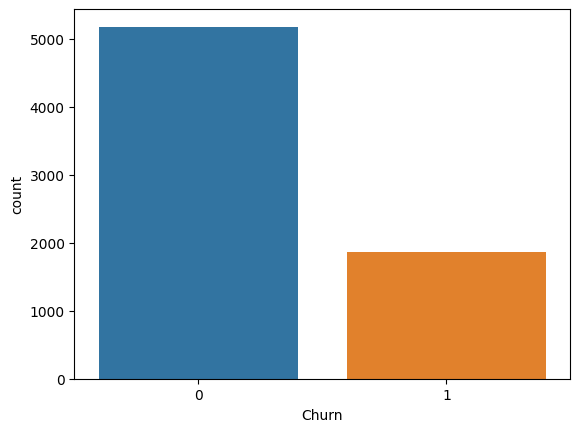

In [12]:
# Visualizando desbalanceamento do Churn
ax = sns.countplot(x='Churn', data=dados)

In [13]:
# Separar os dados em variáveis características e resposta
print(" Shape dos dados antes do SMOTE", dados.shape)
x = dados.drop('Churn', axis = 1)
y = dados['Churn']

# Importando e usando metodo SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
x, y = smt.fit_resample(x, y)  # Realiza a reamostragem do conjunto de dados

# Verificando Distribuição do y
print('\n Distribuição dos Valores de y')
display(y.value_counts())

# recriando o df dados
dados = pd.concat([x,y],axis=1)
print("\n Shape dos dados depois do SMOTE", dados.shape)

 Shape dos dados antes do SMOTE (7043, 39)

 Distribuição dos Valores de y


0    5174
1    5174
Name: Churn, dtype: int64


 Shape dos dados depois do SMOTE (10348, 39)


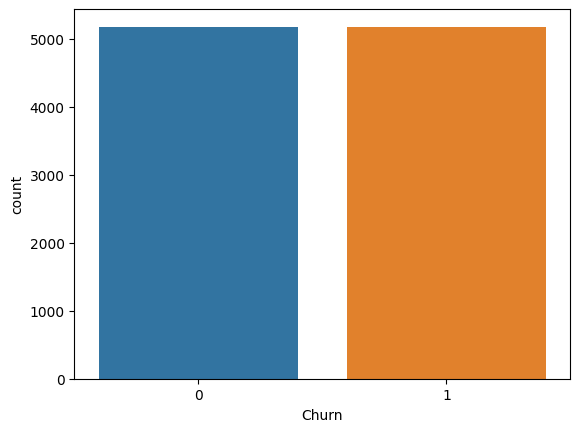

In [14]:
# Visualizando desbalanceamento do Churn
ax = sns.countplot(x='Churn', data=dados)

## Sepação x e y e normalização

In [15]:
# Dividindo valores em x e Y
X = dados.drop('Churn', axis=1)
y = dados['Churn']

# Normalizando os dados
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

X_normalizado

array([[-0.41318358,  1.26542767, -0.52771004, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.41318358, -0.79024667, -0.52771004, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.41318358, -0.79024667, -0.52771004, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       ...,
       [-0.41318358, -0.79024667, -0.52771004, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.41318358, -0.79024667, -0.52771004, ..., -0.76702973,
        -0.47912706, -0.4360152 ],
       [-0.41318358, -0.79024667, -0.52771004, ..., -0.76702973,
        -0.47912706, -0.4360152 ]])

## Treino e teste

In [16]:
# Dados em Separando em Treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y,
                                                        test_size=0.3, # 30% tamanho do teste
                                                        random_state=123)

# Treinando Modelos

## Treinando Modelo com KNeighbors

In [17]:
# Treinando Modelo
knn = KNeighborsClassifier(metric='euclidean') # Definido Modelo
knn.fit(X_treino, y_treino) # Treinando
predito_knn = knn.predict(X_teste) # Testando
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

## Treinando Modelo BernoulliNB

In [18]:
# Encontrar Media dos Valores de Treino
np.median(X_treino)

-0.4461759755508453

In [19]:
# Iniciando modelo de BernoulliNB
# Parametro "binarize = -0.44" Transforma as veriaveis de treino em Variaveis binarias EX:
# Tudo acima de "-0.44" viram 1 e abaixo vira 0
# Porem nao posso usar Valores negativos entao usarei o valor 0
bnb = BernoulliNB(binarize = 0)

# Treinando e testar modelo Modelo
bnb.fit(X_treino,y_treino)
predito_bnb = bnb.predict(X_teste)
predito_bnb

array([1, 0, 0, ..., 1, 1, 1])

## Treinando Modelo Arvore de Descisão

In [20]:
# Criar Modelo de DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42) # Definir uma SEED e triterio e entropia
dtc.fit(X_treino,y_treino)

# importancia de cada coluna Atributo
for i in range(len(dados.columns)-1):
  print(f"{round(dtc.feature_importances_[i],3)}  -> {dados.columns[i]}")

0.018  -> Maior65Anos
0.021  -> Conjuge
0.015  -> Dependentes
0.165  -> MesesDeContrato
0.006  -> TelefoneFixo
0.017  -> PagamentoOnline
0.223  -> ContaMensal
0.009  -> VariasLinhasTelefonicas_Nao
0.003  -> VariasLinhasTelefonicas_SemServicoTelefonico
0.01  -> VariasLinhasTelefonicas_Sim
0.002  -> ServicoDeInternet_DSL
0.031  -> ServicoDeInternet_FibraOptica
0.004  -> ServicoDeInternet_Nao
0.01  -> SegurancaOnline_Nao
0.0  -> SegurancaOnline_SemServicoDeInternet
0.017  -> SegurancaOnline_Sim
0.007  -> BackupOnline_Nao
0.0  -> BackupOnline_SemServicoDeInternet
0.01  -> BackupOnline_Sim
0.01  -> SeguroNoDispositivo_Nao
0.0  -> SeguroNoDispositivo_SemServicoDeInternet
0.009  -> SeguroNoDispositivo_Sim
0.015  -> SuporteTecnico_Nao
0.001  -> SuporteTecnico_SemServicoDeInternet
0.02  -> SuporteTecnico_Sim
0.003  -> TVaCabo_Nao
0.0  -> TVaCabo_SemServicoDeInternet
0.001  -> TVaCabo_Sim
0.007  -> StreamingDeFilmes_Nao
0.0  -> StreamingDeFilmes_SemServicoDeInternet
0.013  -> StreamingDeFilmes_S

In [21]:
predito_ArvoreDecisao = dtc.predict(X_teste)
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

# Validação dos Modelos

## Matriz de confusão

In [25]:
# Exibindo matriz de confusão das predições

print("Matriz de confusão do Modelo com KNeighbors")
print(confusion_matrix(y_teste,predito_knn))

print("\n\nMatriz de confusão do Modelo BernoulliNB")
print(confusion_matrix(y_teste,predito_bnb))

print("\n\nMatriz de confusão do Modelo Arvore de Descisão")
print(confusion_matrix(y_teste,predito_ArvoreDecisao))

Matriz de confusão do Modelo com KNeighbors
[[1242  327]
 [ 248 1288]]


Matriz de confusão do Modelo BernoulliNB
[[1091  478]
 [ 241 1295]]


Matriz de confusão do Modelo Arvore de Descisão
[[1247  322]
 [ 284 1252]]


## Acurácia

In [34]:
# Exibindo Acuracia das predições
print("Acuracia do Modelo com KNeighbors")
print(round(accuracy_score(y_teste,predito_knn)*100,2),'%')

print("\nAcuracia do Modelo BernoulliNB")
print(round(accuracy_score(y_teste,predito_bnb)*100,2),'%')

print("\nAcuracia do Modelo Arvore de Descisão")
print(round(accuracy_score(y_teste,predito_ArvoreDecisao)*100,2),'%')

Acuracia do Modelo com KNeighbors
81.48 %

Acuracia do Modelo BernoulliNB
76.84 %

Acuracia do Modelo Arvore de Descisão
80.48 %


## Precisão

In [39]:
# Exibindo a Precisão das predições
print("Precisão do Modelo com KNeighbors")
print(round(precision_score(y_teste,predito_knn)*100,2),'%')

print("\nPrecisão do Modelo BernoulliNB")
print(round(precision_score(y_teste,predito_bnb)*100,2),'%')

print("\nPrecisão do Modelo Arvore de Descisão")
print(round(precision_score(y_teste,predito_ArvoreDecisao)*100,2),'%')

Precisão do Modelo com KNeighbors
79.75 %

Precisão do Modelo BernoulliNB
73.04 %

Precisão do Modelo Arvore de Descisão
79.54 %


## Recall

In [40]:
# Exibindo o Recall das predições
print("Recall do Modelo com KNeighbors")
print(round(recall_score(y_teste,predito_knn)*100,2),'%')

print("\nRecall do Modelo BernoulliNB")
print(round(recall_score(y_teste,predito_bnb)*100,2),'%')

print("\nRecall do Modelo Arvore de Descisão")
print(round(recall_score(y_teste,predito_ArvoreDecisao)*100,2),'%')

Recall do Modelo com KNeighbors
83.85 %

Recall do Modelo BernoulliNB
84.31 %

Recall do Modelo Arvore de Descisão
81.51 %
